In [4]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import copy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

## Algorithms
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#from mlxtend.classifier import StackingClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_raw = pd.read_csv('data/train.csv')
train_raw.describe(include=[np.number])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

# Try to find dependencies between salePrice and other variables

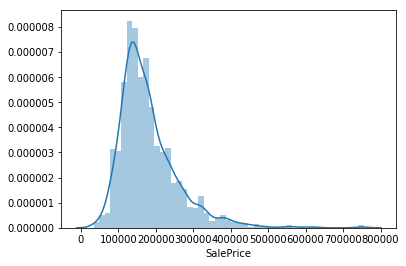

In [7]:
#print(train_raw['SalePrice'].isnull().sum()) # make sure all items have a price
#plt.figure(figsize=(15,8))
sns.distplot(train_raw['SalePrice']);
#train_raw['SalePrice'].hist()

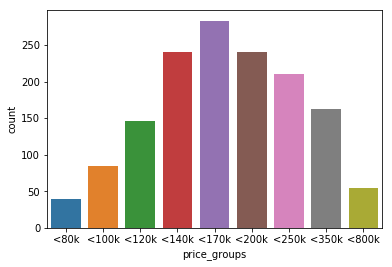

In [22]:
# try to make a sensible binning of prices for further investigations
train_raw['price_groups'] = pd.cut(train_raw['SalePrice'],
                                   [0, 80000, 100000, 120000, 140000, 170000,200000,250000,350000,800000], 
                                   labels=['<80k','<100k','<120k','<140k','<170k','<200k','<250k','<350k','<800k'])
price_groups=train_raw.groupby(['price_groups'])['Id'].agg(['count']) 
price_groups.reset_index(inplace=True)
sns.barplot(x='price_groups',y='count', data=price_groups)


## Size of home

0


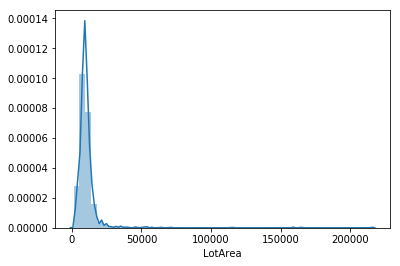

In [10]:
print(train_raw['LotArea'].isnull().sum()) # make sure all items have a value
sns.distplot(train_raw['LotArea']); 

lot area is even more skewed than price - but skewedness is in the same direction, so there might be a weak dependency! (greater areas cost more of course)

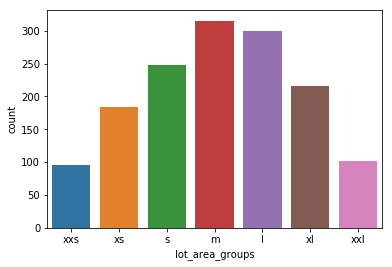

In [11]:
# try to make a sensible binning for lot area 

train_raw['lot_area_groups'] = pd.cut(train_raw['LotArea'], 
                                      [0, 4000, 7000, 8500, 10000, 12000, 16000, 250000], 
                                      labels=['xxs','xs','s','m','l','xl','xxl']
                                     )

area_groups = train_raw.groupby(['lot_area_groups'])['Id'].agg(['count'])
area_groups.reset_index(inplace=True)
sns.barplot(x='lot_area_groups',y='count', data=area_groups)



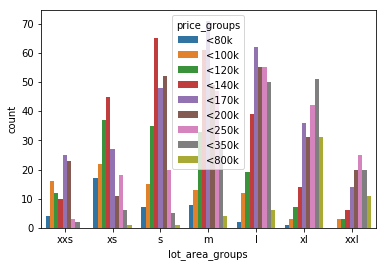

In [12]:
cnt=train_raw.groupby(['lot_area_groups','price_groups'])['Id'].agg(['count'])
cnt.reset_index(inplace=True)
sns.barplot(x='lot_area_groups',y='count', hue='price_groups', data=cnt)

## age from time build

0


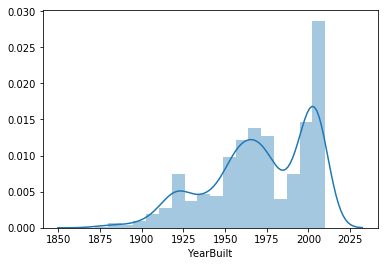

In [13]:
print(train_raw['YearBuilt'].isnull().sum()) # make sure all items have a value
sns.distplot(train_raw['YearBuilt']);

## condition

0


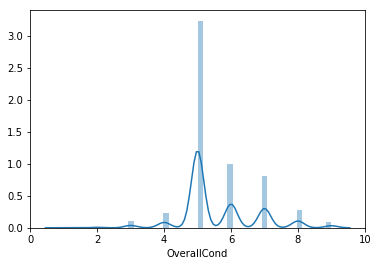

In [15]:
print(train_raw['OverallCond'].isnull().sum()) # make sure all items have a value
sns.distplot(train_raw['OverallCond']);

0


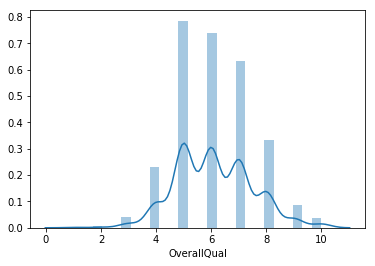

In [16]:
print(train_raw['OverallQual'].isnull().sum()) # make sure all items have a value
sns.distplot(train_raw['OverallQual']);

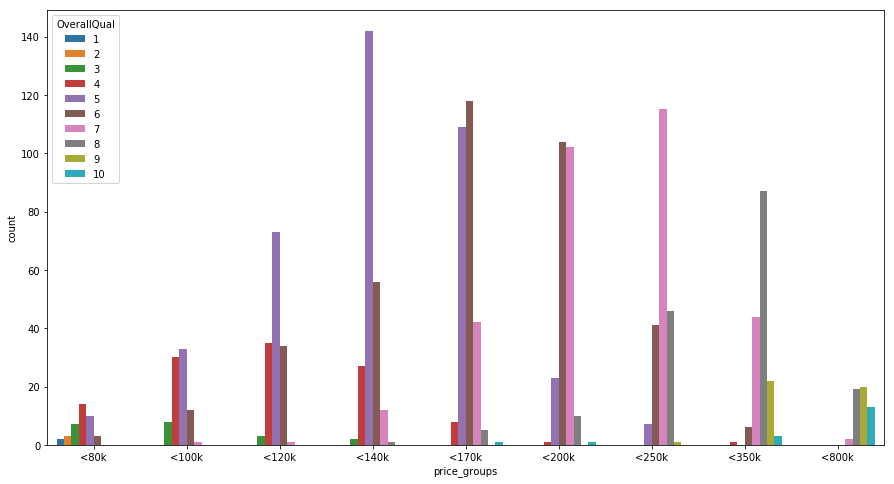

In [19]:
cnt=train_raw.groupby(['OverallQual','price_groups'])['Id'].agg(['count'])
cnt.reset_index(inplace=True)

sns.barplot(x='price_groups',y='count', hue='OverallQual', data=cnt)

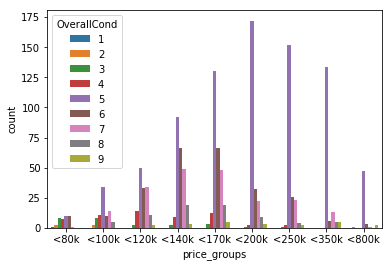

In [18]:
cnt=train_raw.groupby(['OverallCond','price_groups'])['Id'].agg(['count'])
cnt.reset_index(inplace=True)
sns.barplot(x='price_groups',y='count', hue='OverallCond', data=cnt)

Quality behaves differently from Condition.  
Quality and price seem not to be correlated. All price groups have a strong middle quality bias.  
In Condition it seems to be the case, that the higher price, the better the condition.